## EDA

In [ ]:
!pip install psycopg2-binary

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath(''), os.pardir))
sys.path.append(PROJECT_ROOT)
import helpers as db


In [17]:
print(db.connect_to_db())

<cursor object at 0x7f5ad4d39300; closed: 0>


### Question 1: For a given country, what is the trend of their average temperature?

In [62]:
cursor = db.connect_to_db()

In [63]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Afghanistan';")

In [64]:
afghanistan_data = cursor.fetchall()

In [65]:
df_country = pd.DataFrame(afghanistan_data, columns=[desc[0] for desc in cursor.description])

<AxesSubplot:title={'center':'Average Temperature of Afghanistan (by year)'}, xlabel='year'>

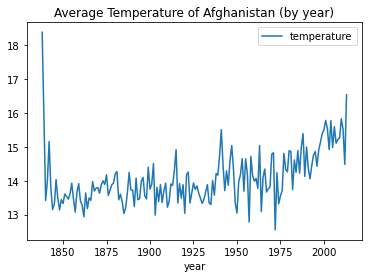

In [66]:
country_q1 = 'Afghanistan'
df_country = df_country.sort_values(by=['dt'], ascending=True)
df_country = df_country.replace(to_replace='', value = np.nan,regex=True)
df_country = df_country.dropna()
df_country['year'] = df_country['dt'].str[:4].astype(int)
df_country['averagetemperature'] = df_country['averagetemperature'].astype(float)
df_country['temperature'] = df_country.groupby('year')['averagetemperature'].transform('mean')
df_country.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country_q1 + ' (by year)'
)

In [67]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Europe';")
europe_data = cursor.fetchall()
df_country_1 = pd.DataFrame(europe_data, columns=[desc[0] for desc in cursor.description])

<AxesSubplot:title={'center':'Average Temperature of Europe (by year)'}, xlabel='year'>

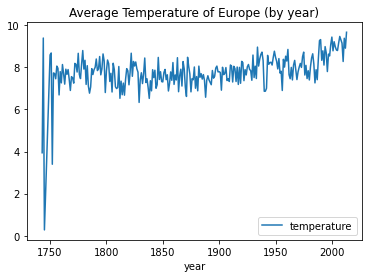

In [68]:
country = 'Europe'
df_country_1 = df_country_1.sort_values(by=['dt'], ascending=True)
df_country_1 = df_country_1.replace(to_replace='', value = np.nan,regex=True)
df_country_1 = df_country_1.dropna()
df_country_1['year'] = df_country_1['dt'].str[:4].astype(int)
df_country_1['averagetemperature'] = df_country_1['averagetemperature'].astype(float)
df_country_1['temperature'] = df_country_1.groupby('year')['averagetemperature'].transform('mean')
df_country_1.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

In [69]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'India';")
india_data = cursor.fetchall()
df_country_2 = pd.DataFrame(india_data, columns=[desc[0] for desc in cursor.description])

<AxesSubplot:title={'center':'Average Temperature of India (by year)'}, xlabel='year'>

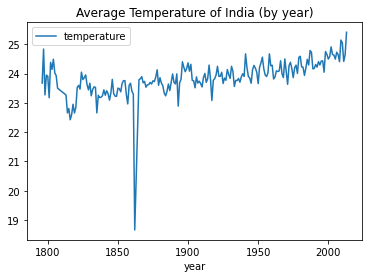

In [70]:
country = 'India'
df_country_2 = df_country_2.sort_values(by=['dt'], ascending=True)
df_country_2 = df_country_2.replace(to_replace='', value = np.nan,regex=True)
df_country_2 = df_country_2.dropna()
df_country_2['year'] = df_country_2['dt'].str[:4].astype(int)
df_country_2['averagetemperature'] = df_country_2['averagetemperature'].astype(float)
df_country_2['temperature'] = df_country_2.groupby('year')['averagetemperature'].transform('mean')
df_country_2.drop_duplicates(
    subset=["year"], keep="first"
).plot(
    x="year", y="temperature", kind="line", title="Average Temperature of " + country + ' (by year)'
)

### Question 2: For a given year and a given country, what is the max/min temperature?

In [71]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Norway';")
norway_data = cursor.fetchall()
df_country_3 = pd.DataFrame(norway_data, columns=[desc[0] for desc in cursor.description])

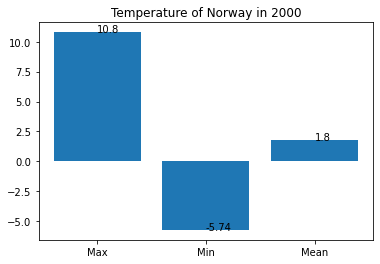

In [72]:
year_q2 = 2000
country_q2 = 'Norway'
df_country_3 = df_country_3.sort_values(by=['dt'], ascending=True)
df_country_3 = df_country_3.replace(to_replace='', value = np.nan,regex=True)
df_country_3 = df_country_3.dropna()
df_country_3['year'] = df_country_3['dt'].str[:4].astype(int)
df_country_3['averagetemperature'] = df_country_3['averagetemperature'].astype(float)
max = df_country_3[df_country_3["year"] == year_q2]['averagetemperature'].max()
min = df_country_3[df_country_3["year"] == year_q2]['averagetemperature'].min()
mean = df_country_3[df_country_3["year"] == year_q2]['averagetemperature'].mean()
plt.bar(["Max", "Min", "Mean"], [max, min, mean])
plt.title("Temperature of " + country_q2 + ' in ' + str(year_q2))
for index, value in enumerate([max, min, mean]):
    plt.text(index, value, np.round(value, 2))
plt.show()

### Question 3: For a given year, which city has the highest/lowest temperature on average in the US?

In [73]:
cursor.execute("SELECT * FROM import.globaltemperaturesbymajorcity where country = 'United States';")
us_data = cursor.fetchall()
df_country_4 = pd.DataFrame(us_data, columns=[desc[0] for desc in cursor.description])


In [81]:
year_q3 = 2010
country_q3 = 'United States'
df_country_4 = df_country_4.sort_values(by=['dt'], ascending=True)
df_country_4 = df_country_4.replace(to_replace='', value = np.nan,regex=True)
df_country_4 = df_country_4.dropna()
df_country_4['year'] = df_country_4['dt'].str[:4].astype(int)
df_country_4['averagetemperature'] = df_country_4['averagetemperature'].astype(float)
df_country_4['temperature'] = df_country_4.groupby(['year', 'city'])['averagetemperature'].transform('mean')
highest = df_country_4[df_country_4["year"] == year_q3].sort_values(by=['temperature'], ascending=False).head(1)
lowest = df_country_4[df_country_4["year"] == year_q3].sort_values(by=['temperature'], ascending=True).head(1)
highest_city = highest['city'].values[0]
lowest_city = lowest['city'].values[0]
print(str(highest_city) + ' had the highest temperature in ' + str(year_q3) + ' on average.')
print(str(lowest_city) + ' had the lowest temperature in ' + str(year_q3) + ' on average.')

Los Angeles had the highest temperature in 2010 on average.
New York had the lowest temperature in 2010 on average.


### Question 4: For a given country, what is the initial and the most recent temperature?

In [82]:
cursor.execute("SELECT * FROM import.globaltemperaturesbycountry where country = 'Thailand';")
thailand_data = cursor.fetchall()
df_country_5 = pd.DataFrame(thailand_data, columns=[desc[0] for desc in cursor.description])

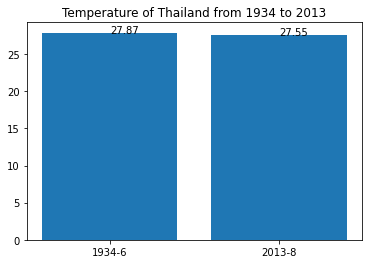

In [85]:
country_q4 = 'Thailand'
df_country_5 = df_country_5.sort_values(by=['dt'], ascending=True)
df_country_5 = df_country_5.replace(to_replace='', value = np.nan,regex=True)
df_country_5 = df_country_5.dropna()
df_country_5['year'] = df_country_5['dt'].str[:4].astype(int)
df_country_5['month'] = df_country_5['dt'].str[5:7].astype(int)
df_country_5['averagetemperature'] = df_country_5['averagetemperature'].astype(float)
initial = df_country_5.loc[0, 'averagetemperature']
initial_month = str(df_country_5.loc[0, 'year']) + '-' + str(df_country_5.loc[0, 'month'])
recent = df_country_5.iloc[-1]['averagetemperature']
recent_month = str(df_country_5.iloc[-1]['year']) + '-' + str(df_country_5.iloc[-1]['month'])
plt.bar([initial_month, recent_month], [initial, recent])
plt.title("Temperature of " + country_q4 + ' from ' + str(initial_month[:4]) + ' to ' + str(recent_month[:4]))
for index, value in enumerate([initial, recent]):
    plt.text(index, value, np.round(value, 2))
plt.show()